# Challenge Machine Learning ANAP

Auteur: TMTC

Date: 10 Décembre 2016

Challenge du WS de X sur les maladies chroniques

## 0. Import the environments

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import random

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.__version__

'0.19.1'

## 1. Load the data

In [3]:
datapath = "../challenge_28_data/"
trainf = "data2.csv"
dataf = datapath + trainf

In [4]:
dataf

'../challenge_28_data/data2.csv'

In [5]:
pd.read_csv(dataf,';')

,Finess,Raison sociale,Provenance des patients (département),Domaines d activités,"âge (deux classes >75 ans, <= 75 ans)",Nombre de séjours/séances MCO des patients en ALD,Nombre total de séjours/séances,annee,cible1
0,10007300,CLINIQUE AMBULATOIRE CENDANEG,01-Ain,D01-Digestif,<=75 ans,19,1061,2008,0.010624
1,10007300,CLINIQUE AMBULATOIRE CENDANEG,01-Ain,D01-Digestif,>75 ans,5,48,2008,0.053320
2,10007300,CLINIQUE AMBULATOIRE CENDANEG,01-Ain,D07-Cardio-vasculaire (hors cathétérismes vasc...,<=75 ans,0,1,2008,0.000000
3,10007300,CLINIQUE AMBULATOIRE CENDANEG,01-Ain,D16-Hématologie,<=75 ans,0,17,2008,0.000000
4,10007300,CLINIQUE AMBULATOIRE CENDANEG,01-Ain,D16-Hématologie,>75 ans,0,2,2008,0.000000
5,10007300,CLINIQUE AMBULATOIRE CENDANEG,01-Ain,D19-Endocrinologie,<=75 ans,0,1,2008,0.000000
6,10007300,CLINIQUE AMBULATOIRE CENDANEG,01-Ain,"D23-Toxicologie, Intoxications, Alcool",<=75 ans,0,1,2008,0.000000
7,10007300,CLINIQUE AMBULATOIRE CENDANEG,01-Ain,"D26-Activités inter spécialités, suivi thérape...",<=75 ans,2,25,2008,0.027969
8,10007300,CLINIQUE AMBULATOIRE CENDANEG,12-Aveyron,D01-Digestif,<=75 ans,0,1,2008,0.000000
9,10007300,CLINIQUE AMBULATOIRE CENDANEG,13-Bouches-du-Rhône,D01-Digestif,>75 ans,0,1,2008,0.000000


In [6]:
train = pd.read_csv(dataf,';')
features_names = list(train)[1:]

In [7]:
features_names

['Raison sociale',
 'Provenance des patients (département)',
 'Domaines d activités',
 'âge (deux classes >75 ans, <= 75 ans)',
 'Nombre de séjours/séances MCO des patients en ALD',
 'Nombre total de séjours/séances',
 'annee',
 'cible1']

In [8]:
type(train)

pandas.core.frame.DataFrame

In [9]:
train.dtypes

Finess                                                object
Raison sociale                                        object
Provenance des patients (département)                 object
Domaines d activités                                  object
âge (deux classes >75 ans, <= 75 ans)                 object
Nombre de séjours/séances MCO des patients en ALD      int64
Nombre total de séjours/séances                        int64
annee                                                  int64
cible1                                               float64
dtype: object

## 2. A glimpse at the data (Bonus)

In [24]:
np.array(train['Finess'].value_counts())
#train['Finess'].values

#np.array(train['Raison sociale'].value_counts())
#train['Raison sociale'].values

#np.array(train['Domaines d activités'].value_counts())
#train['Domaines d activités'].values

#np.array(train['Provenance des patients (département)'].value_counts())
#train['Provenance des patients (département)'].values

#np.array(train['âge (deux classes >75 ans, <= 75 ans)'].value_counts())
#train['âge (deux classes >75 ans, <= 75 ans)'].values

#np.array(train['Nombre de séjours/séances MCO des patients en ALD'].value_counts())
#train['Nombre de séjours/séances MCO des patients en ALD'].values

#np.array(train['Nombre total de séjours/séances'].value_counts())
#train['Nombre total de séjours/séances'].values

#np.array(train['annee'].value_counts())
#train['annee'].values

array([10007300, 10007987, 10008407, ..., 970107454, 970111662, 970211207], dtype=object)

TypeError: cannot convert the series to <class 'float'>

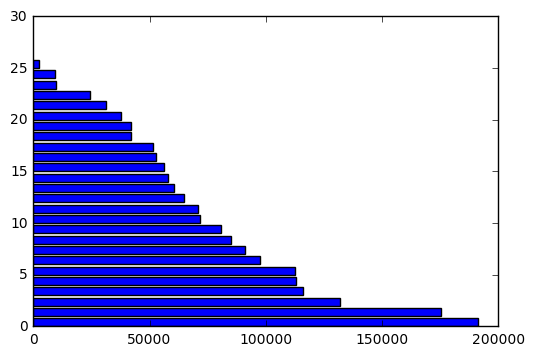

In [53]:

# sort importances
#indices = np.argsort(gbm.feature_importances_)
# plot as bar chart
#plt.barh(np.arange(len(features_names)), gbm.feature_importances_[indices])
#plt.yticks(np.arange(len(features_names)) + 0.25, np.array(features_names)[indices])
#_ = plt.xlabel('Relative importance')


plt.barh(np.arange(train['Domaines d activités'].value_counts().count()),np.array(train['Domaines d activités'].value_counts()))
plt.yticks(np.arange(train['Domaines d activités'].value_counts()))

In [ ]:
plt.barh(np.arange(len(features_names)), gbm.feature_importances_[indices])
plt.yticks(np.arange(len(features_names)) + 0.25, np.array(features_names)[indices])
_ = plt.xlabel('Relative importance')

## 3. Transforming the data

Discard the redundancy

In [10]:
del train['Finess']
#Finess <=> Raison sociale

Age to numeric

In [11]:
train['âge (deux classes >75 ans, <= 75 ans)'][train['âge (deux classes >75 ans, <= 75 ans)']=='<=75 ans']=0
train['âge (deux classes >75 ans, <= 75 ans)'][train['âge (deux classes >75 ans, <= 75 ans)']=='>75 ans']=1
train['âge (deux classes >75 ans, <= 75 ans)'] = pd.to_numeric(train['âge (deux classes >75 ans, <= 75 ans)'])
train.dtypes

Raison sociale                                        object
Provenance des patients (département)                 object
Domaines d activités                                  object
âge (deux classes >75 ans, <= 75 ans)                  int64
Nombre de séjours/séances MCO des patients en ALD      int64
Nombre total de séjours/séances                        int64
annee                                                  int64
cible1                                               float64
dtype: object

In [12]:
le.fit(train['Raison sociale'])
list(le.classes_)
train['Raison sociale'] = le.transform(train['Raison sociale'])
train

,Raison sociale,Provenance des patients (département),Domaines d activités,"âge (deux classes >75 ans, <= 75 ans)",Nombre de séjours/séances MCO des patients en ALD,Nombre total de séjours/séances,annee,cible1
0,602,01-Ain,D01-Digestif,0,19,1061,2008,0.010624
1,602,01-Ain,D01-Digestif,1,5,48,2008,0.053320
2,602,01-Ain,D07-Cardio-vasculaire (hors cathétérismes vasc...,0,0,1,2008,0.000000
3,602,01-Ain,D16-Hématologie,0,0,17,2008,0.000000
4,602,01-Ain,D16-Hématologie,1,0,2,2008,0.000000
5,602,01-Ain,D19-Endocrinologie,0,0,1,2008,0.000000
6,602,01-Ain,"D23-Toxicologie, Intoxications, Alcool",0,0,1,2008,0.000000
7,602,01-Ain,"D26-Activités inter spécialités, suivi thérape...",0,2,25,2008,0.027969
8,602,12-Aveyron,D01-Digestif,0,0,1,2008,0.000000
9,602,13-Bouches-du-Rhône,D01-Digestif,1,0,1,2008,0.000000


In [13]:
#pd.get_dummies(pd.Series(list('acbcaadeeef')))
train_DA = pd.get_dummies(train['Domaines d activités'])
train_PP = pd.get_dummies(train['Provenance des patients (département)'])
train_new = pd.concat([train,train_DA,train_PP],axis=1)
del train_new['Domaines d activités']
del train_new['Provenance des patients (département)']

In [14]:
#Reorder the column
cols = train_new.columns.tolist()
cols =  cols[5:] + cols[1:5]
cols
train_new=train_new[cols]

In [15]:
#train_new.dtypes
train_DA

,D01-Digestif,D02-Orthopédie traumatologie,D03-Traumatismes multiples ou complexes graves,D04-Rhumatologie,D05-Système nerveux (hors cathétérismes vasculaires diagnostiques et interventionnels),D06-Cathétérismes vasculaires diagnostiques et interventionnels,D07-Cardio-vasculaire (hors cathétérismes vasculaires diagnostiques et interventionnels),D09-Pneumologie,"D10-ORL, Stomatologie",D11-Ophtalmologie,...,D18-Maladies infectieuses (dont VIH),D19-Endocrinologie,D20-Tissu cutané et tissu sous-cutané,D21-Brûlures,D22-Psychiatrie,"D23-Toxicologie, Intoxications, Alcool","D24-Douleurs chroniques, Soins palliatifs",D25-Transplant. d'organes,"D26-Activités inter spécialités, suivi thérapeutique d'affections connues",D27-Séances
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Preparing the folds

On pourrait utiliser [`sklearn.cross_validation`](http://scikit-learn.org/stable/modules/cross_validation.html#k-fold) pour préparer les folds mais on le fait "à la main" pour cette première fois.

In [16]:
import random
def kfolds(k,N,seed=None):
    random.seed(seed)
    out = [ list() for _ in range(k) ]
    for n in range(N): out[random.randrange(k)].append(n)
    return(out)

K = kfolds(seed=42,k=5,N=len(train_new))
fold1 = sum(K[1:5],[]) # K[1] + K[2] + K[3] + K[4]
#fold1 = K[1]+K[2]+K[3]+K[4]
xtrain = train_new.iloc[fold1][train_new.keys()[1:]]
ytrain = train_new.iloc[fold1][train_new.keys()[0]]

In [20]:
xtest = train_new.iloc[K[0]][train_new.keys()[1:]]
ytest = train_new.iloc[K[0]][train_new.keys()[0]]

# GradientBoostingRegressor

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(loss="ls",
                                 n_estimators=100,
                                 learning_rate=0.1,
                                 max_depth=5,
                                 subsample=0.75,
                                 verbose=1)


In [ ]:
gbr.fit(xtrain,ytrain)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0246           0.0044           21.54m
         2           0.0210           0.0036           21.38m
         3           0.0180           0.0030           20.03m
         4           0.0157           0.0024           19.54m


In [ ]:
from sklearn.metrics import mean_squarred_error
lr_preds = lr.predict_proba(xtest)[:,1]
print("mean squarred error:    {}".format(mean_squarred_error(ytest,lr_preds)))

## 5. GLM

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

ValueError: Unknown label type: 'continuous'

On calcule le score sur le fold restant

In [61]:
from sklearn.metrics import roc_auc_score, log_loss
lr_preds = lr.predict_proba(xtest)[:,1]
print("auc:      {}".format(roc_auc_score(ytest, lr_preds)))
print("log_loss: {}".format(log_loss(ytest,lr_preds)))

auc:      0.7116089661938119
log_loss: 0.5335495827041714


## 5. Support Vector Machines

In [62]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(xtrain,ytrain)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [63]:
svm_preds = svm.predict(xtest)
print("auc:      {}".format(roc_auc_score(ytest, svm_preds)))
print("log_loss: {}".format(log_loss(ytest,svm_preds)))

auc:      0.5000095184374495
log_loss: 9.203247599367224


## 6. Gradient Boosted Machines

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(loss='exponential')
gbm.fit(xtrain,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Une fois entraîné, on utilise le modèle pour prédire sur le fold 1.

In [17]:
gbm_preds = gbm.predict_proba(xtest)[:,1]
print("auc:      {}".format(roc_auc_score(ytest, gbm_preds)))
print("log_loss: {}".format(log_loss(ytest,gbm_preds)))

auc:      0.8655571102228606
log_loss: 0.17592935502967735


## 7. Changer les paramètres

In [18]:
gbm = GradientBoostingClassifier(loss="deviance",
                                 n_estimators=100,
                                 learning_rate=0.1,
                                 max_depth=5,
                                 subsample=0.75,
                                 verbose=1)
gbm.fit(xtrain, ytrain)
gbm_preds = gbm.predict_proba(xtest)[:,1]
print("auc:      {}".format(roc_auc_score(ytest, gbm_preds)))
print("log_loss: {}".format(log_loss(ytest,gbm_preds)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4559           0.0382           21.82s
         2           0.4364           0.0186           21.57s
         3           0.4197           0.0133           21.27s
         4           0.4067           0.0102           20.88s
         5           0.4022           0.0077           20.63s
         6           0.3938           0.0066           20.48s
         7           0.3862           0.0051           20.34s
         8           0.3818           0.0041           20.10s
         9           0.3804           0.0036           19.77s
        10           0.3795           0.0029           20.03s
        20           0.3592           0.0004           20.68s
        30           0.3481           0.0001           18.01s
        40           0.3478           0.0000           15.05s
        50           0.3436           0.0000           12.53s
        60           0.3414          -0.0001            9.92s
       

Qui nous donne un résultat comparable aux paramètres par défaut; légèrement moins bon même.

## 8. Impact du nombre d'arbres

In [19]:
aucs = [ roc_auc_score(ytest, gbm_pred[:,1]) for gbm_pred in gbm.staged_predict_proba(xtest) ]

Puis pour le plot:

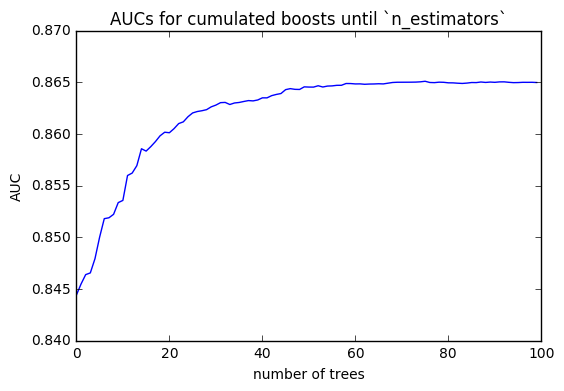

In [20]:
import matplotlib.pyplot as plt
plt.plot(aucs)
plt.title("AUCs for cumulated boosts until `n_estimators`")
plt.xlabel("number of trees")
plt.ylabel("AUC")

On voit donc qu'en terme d'AUC, on fait du surapprentissage au delà d'une cinquantaine d'arbres

## 9. Importance des variables et dépendances partielles

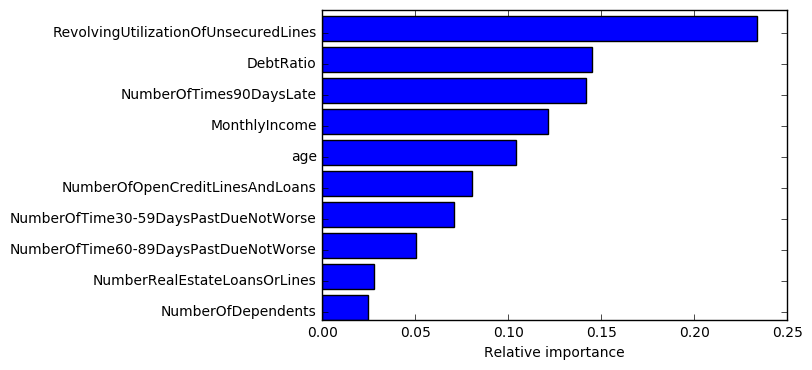

In [21]:
import numpy as np
# sort importances
indices = np.argsort(gbm.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(features_names)), gbm.feature_importances_[indices])
plt.yticks(np.arange(len(features_names)) + 0.25, np.array(features_names)[indices])
_ = plt.xlabel('Relative importance')

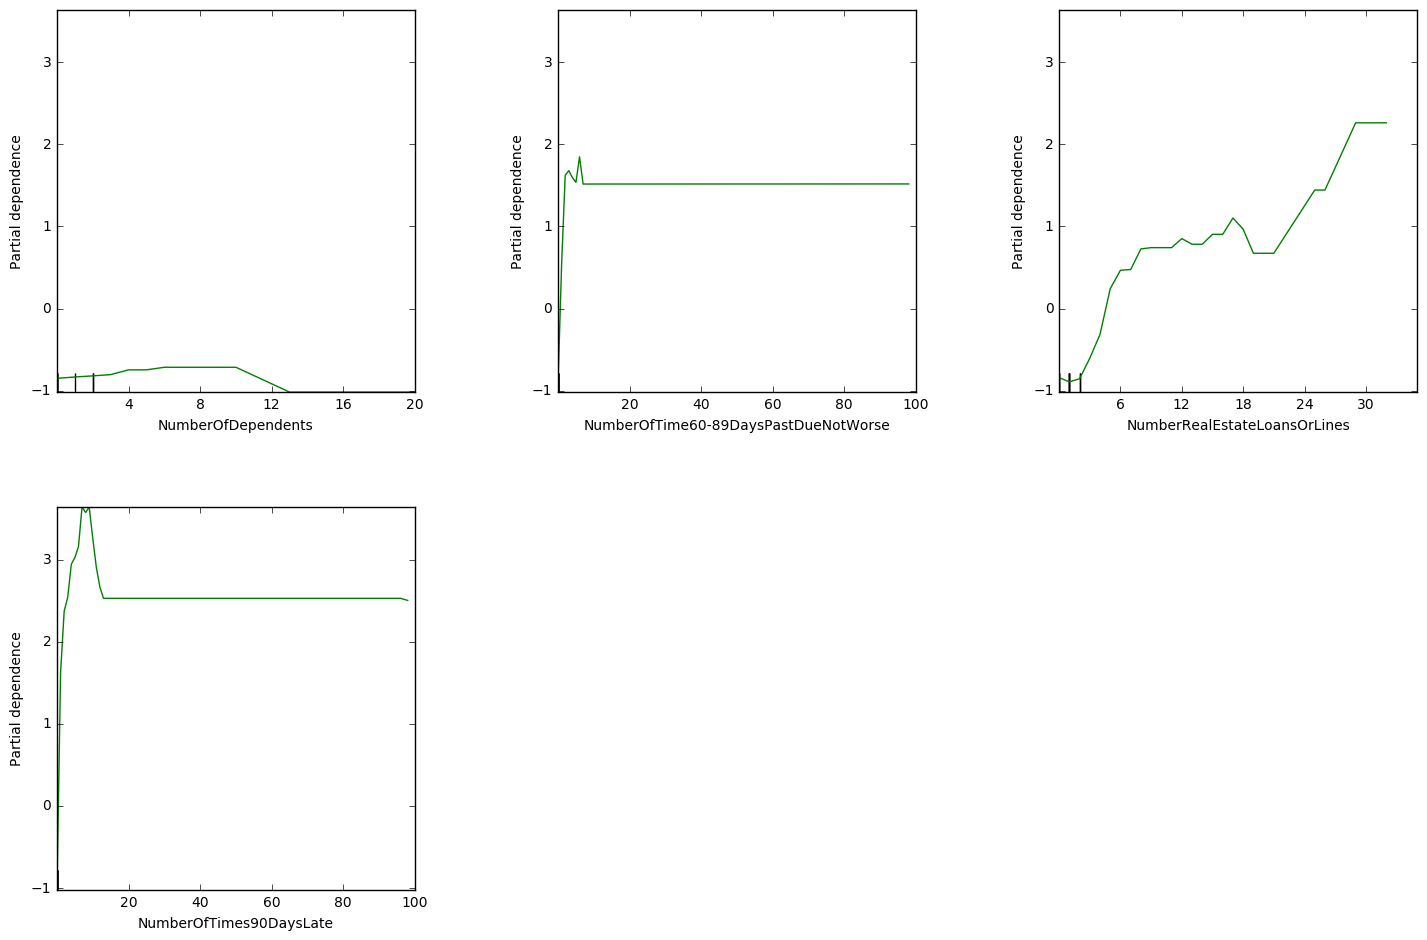

In [22]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
features =  [u'RevolvingUtilizationOfUnsecuredLines',
             u'age',
             u'NumberOfTime30-59DaysPastDueNotWorse',
             u'DebtRatio', u'MonthlyIncome',
             u'NumberOfOpenCreditLinesAndLoans',
             u'NumberOfTimes90DaysLate',
             u'NumberRealEstateLoansOrLines',
             u'NumberOfTime60-89DaysPastDueNotWorse',
             u'NumberOfDependents',
             (u'RevolvingUtilizationOfUnsecuredLines',u'NumberOfTimes90DaysLate'),
             (u'MonthlyIncome',u'age')
            ]
top4 = features_names[-1:-5:-1]
_ = plot_partial_dependence(gbm, xtrain, top4,
                            feature_names=features_names,figsize=(16,16))

Scikit-learn offre aussi la possibilité de visualiser l'effet de couples de variables:

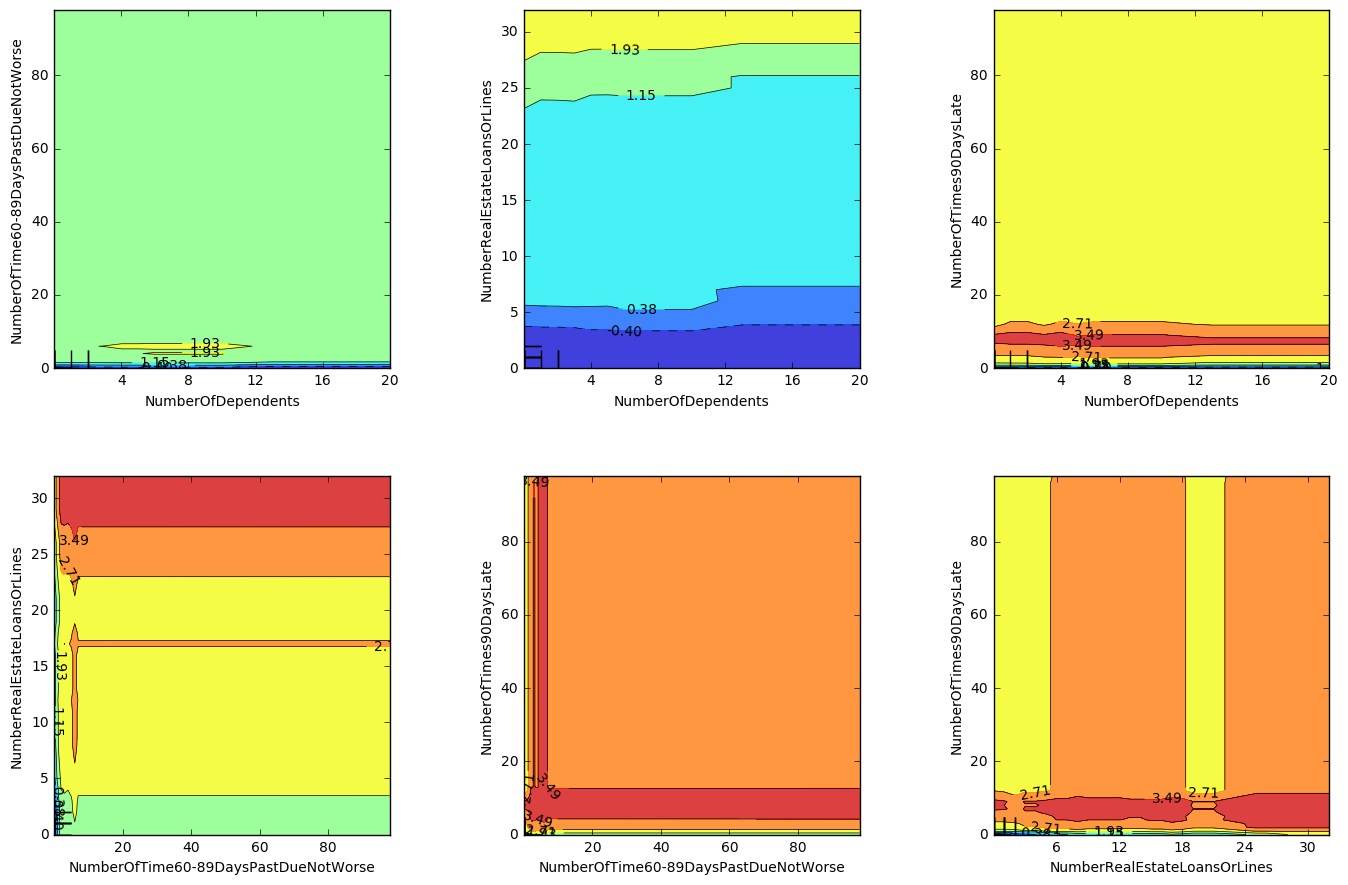

In [23]:
from itertools import combinations

_ = plot_partial_dependence(gbm, xtrain, combinations(top4,2),
                        feature_names=features_names, figsize=(15,15))

## 10. Forêts Aléatoires

In [24]:
import multiprocessing
num_cores = multiprocessing.cpu_count()
from sklearn.cross_validation import KFold
kf = list(KFold(len(xtrain),num_cores))

from joblib import Parallel, delayed  

from sklearn.ensemble import RandomForestClassifier

def fit_model(traini):
    rfc = RandomForestClassifier()
    rfc.fit(xtrain[traini], ytrain[traini])
    return(rfc)

kf = list(KFold(len(xtrain),num_cores))
rfcs = Parallel(n_jobs=num_cores)( delayed(fit_model)(traini) for traini,_ in kf)
preds = np.empty_like(ytrain)
for i,(_,testi) in enumerate(kf):
    preds[testi] = rfcs[i].predict_proba(xtrain[testi])[:,1]
print("auc:      {}".format(roc_auc_score(ytrain, preds)))
print("log_loss: {}".format(log_loss(ytrain,preds)))

/Applications/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


ImportError: No module named 'joblib'

On voit que les résultats sont moins bons que pour les Boosted Models avec les paramètres par défaut. On cherche donc à voir s'il existe des paramètres qui donnent une meilleure AUC. Ici on utilise `GridSearchCV`, `cross_val_score` et le paramètre `n_jobs` qui sont des outils très pratiques de `scikit-learn`. En réalité `n_jobs` fait appel à `joblib` et on aurait pu l'utiliser pour les GBM également, tout comme `GridSearchCV` et `cross_val_score`. L'idée étant d'aborder les problèmes et les outils sous différents angles pour mieux les cerner.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
#Uncomment the following for GridSearch: can take 1+ hour
#from sklearn.grid_search import GridSearchCV
#gs = GridSearchCV(RandomForestClassifier(n_jobs=-1), 
#                  {'max_features' : range(1,11), 'n_estimators': [500]}, 
#                  scoring='roc_auc')
#gs.fit(xtrain,ytrain)
#print(gs.best_params_) #Outputs {'max_features':1, 'n_estimators' : 500}
cross_val_score(RandomForestClassifier(max_features=1,n_estimators=500,n_jobs=-1),
                xtrain, ytrain, cv=num_cores, scoring='roc_auc').mean()

On peut, comme pour les GBM, utiliser le modèle appris pour classer les variables par ordre d'importance.

In [ ]:
rfc = RandomForestClassifier(n_estimators=500,max_features=1,n_jobs=-1)
rfc.fit(xtrain,ytrain)
indices = np.argsort(rfc.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(features_names)), rfc.feature_importances_[indices])
plt.yticks(np.arange(len(features_names)) + 0.25, np.array(features_names)[indices])
_ = plt.xlabel('Relative importance')

On constate que c'est le même ordre d'importance que pour le GBM estimé plus haut.

## 11. Mélange

In [ ]:
def fit_gbm(traini):
    gbm = GradientBoostingClassifier(loss="deviance",
                                     n_estimators = 100,
                                     learning_rate = 0.1,
                                     max_depth = 5,
                                     subsample = .75,
                                     verbose = 0)
    gbm.fit(xtrain[traini],ytrain[traini])
    return(gbm)

gbms = Parallel(n_jobs=num_cores)( delayed(fit_gbm)(traini) for traini,_ in kf)

def fit_rfc(traini):
    rfc = RandomForestClassifier(n_estimators=500,max_features=1)
    rfc.fit(xtrain[traini],ytrain[traini])
    return(rfc)

rfcs = Parallel(n_jobs=num_cores)( delayed(fit_rfc)(traini) for traini,_ in kf)

In [ ]:
preds = np.empty_like(ytrain)
for i,(_,testi) in enumerate(kf):
    preds[testi] = (.07*rfcs[i].predict_proba(xtrain[testi])[:,1] +
                    .93*gbms[i].predict_proba(xtrain[testi])[:,1])
print("auc:      {}".format(roc_auc_score(ytrain, preds)))
print("log_loss: {}".format(log_loss(ytrain,preds)))

## 12. Prédictions sur les données de test en csv

In [ ]:
gbm = GradientBoostingClassifier(loss="deviance",
                                 n_estimators = 100,
                                 learning_rate = 0.1,
                                 max_depth = 5,
                                 subsample = .75,
                                 verbose = 0)
gbm.fit(xtrain,ytrain)
rfc = RandomForestClassifier(n_estimators=500,
                             max_features=1)
rfc.fit(xtrain,ytrain)

testname = "cs-test.csv"
testf = datapath + testname
test = pd.read_csv(testf,index_col=0)
test = imp.fit_transform(test)

preds = .07*rfc.predict_proba(test)[:,1] + .93*gbm.predict_proba(test)[:,1]

On peut vouloir stocker les prédictions sur disque sous forme de fichier csv

In [ ]:
np.savetxt('preds.csv', preds, delimiter =',')